#### 1.Explain the difference between simple linear regression and multiple linear regression. Provide an example of each.


#### Simple Linear Regression is a statistical method that helps to model the relationship between a dependent variable (target) and one independent variable (predictor). The relationship is represented by a linear equation in the form: 
    y=mx+c
y is the dependent variable (target),

x is the independent variable (predictor),

m is the slope of the line, and

b is the y-intercept.

#### example

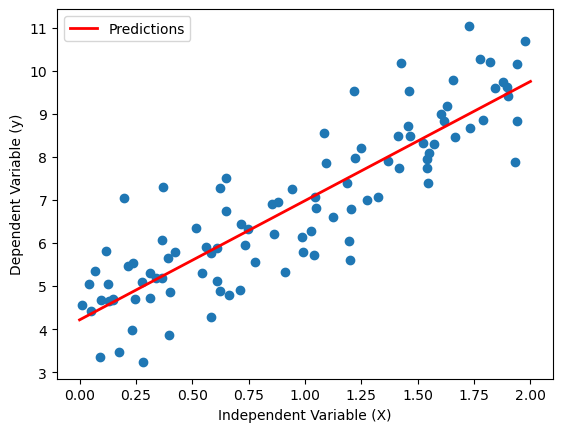

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.legend()
plt.show()


#### Multiple Linear Regression extends simple linear regression by considering multiple independent variables to predict the dependent variable. The relationship is represented by the equation:
    y=b0+b1x1+b2x2+...+bnxn
    
    y is the dependent variable
    
    x1,x2,...,xn are the independent variables
    
    b0 is the y-intercept
    
    b1,b2,...,bn are the coefficiants representing the impact of each independent variable.

#### example

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate random data with two independent variables
np.random.seed(42)
X = 2 * np.random.rand(100, 2)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for new data
X_new = np.array([[1, 2]])
y_pred = model.predict(X_new)

print("Predicted y:", y_pred[0])


Predicted y: 17.296551683321923


#### Q2. Discuss the assumptions of linear regression. How can you check whether these assumptions hold in a given dataset?

#### Linear regression makes several assumptions about the data for the model to be valid. Here are the key assumptions:

#### A.Linearity:
Assumption: The relationship between the independent variables and the dependent variable should be linear.

Check: Visual inspection using scatter plots of each independent variable against the dependent variable. Alternatively, statistical tests can be performed.

#### B.Independence:
Assumption: The residuals (the differences between the observed and predicted values) should be independent.

Check: Durbin-Watson test for autocorrelation in residuals or visual inspection of residuals over time (for time series data).

#### Example

In [ ]:
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

# Assuming 'X' is your feature matrix and 'y' is your target variable

# 1. Linearity
sns.pairplot(pd.concat([X, pd.DataFrame(y, columns=['target'])], axis=1))
plt.show()

# 2. Independence
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
durbin_watson_stat = sm.stats.durbin_watson(results.resid)

# 3. Homoscedasticity
residuals = results.resid
sns.scatterplot(results.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 4. Normality of Residuals
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
sm.qqplot(residuals, line='s')
plt.show()

# 5. Multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


#### Q3. How do you interpret the slope and intercept in a linear regression model? Provide an example using a real-world scenario.


#### 
In a linear regression model, the slope and intercept are coefficients that define the relationship between the independent variable(s) and the dependent variable. The equation for a simple linear regression model is:
    y=mx+b
    where:
        y is the dependent variable
        
        x is the independent variable
        
        m is the slop and
        
        b is the y-intercept
        
Interpretation:
    
    slop(m): Represents the change in the dependent variable for a one-unit in the independent variable.
    
    if m is positive, it indicates a positive realtionship. As x in increase, y also increase.
    
    if m is negative, it indicates a negative realtionship. As x increase, y decrease
    
    Intercept(b):
        Represents the value of the dependent variable when the independent variable is zero.
        
        In some contexts, the intercept might not have a meaningful interpretation, especially if the independent variable cannot logically be zero.

#### example

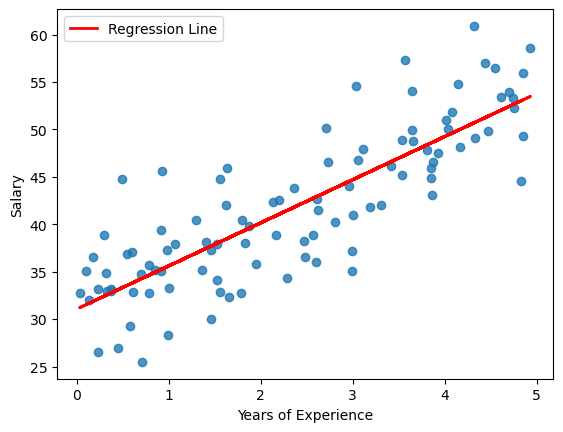

Slope (m): 4.540226772876968
Intercept (b): 31.07548078773373


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some synthetic data
np.random.seed(42)
X = 5 * np.random.rand(100, 1)  # Years of experience
y = 30 + 5 * X + np.random.randn(100, 1) * 5  # Salary

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Plot the data and the regression line
plt.scatter(X, y, alpha=0.8)
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Interpret the slope and intercept
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")


#### Interpretation:
The slope (m) tells us the average increase in salary for each additional year of experience.
The intercept (b) represents the estimated starting salary when an employee has zero years of experience.

#### Q4. Explain the concept of gradient descent. How is it used in machine learning?

#### Gradient Descent:
Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models. The basic idea is to iteratively adjust the model parameters in the direction of the steepest descent of the cost function. The "gradient" refers to the partial derivatives of the cost function with respect to each parameter, providing the direction and magnitude of the steepest increase.



#### example

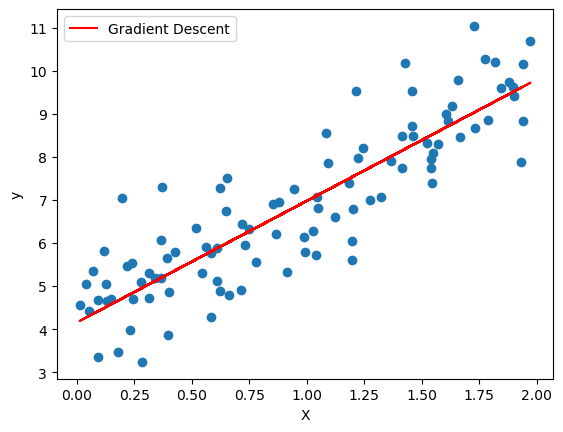

Intercept: 4.158093763822134
Slope: 2.8204434017416244


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/len(X) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Final parameters
intercept, slope = theta[0][0], theta[1][0]

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


#### Q5. Describe the multiple linear regression model. How does it differ from simple linear regression?

#### Multiple Linear Regression:
Multiple Linear Regression is an extension of simple linear regression that models the relationship between a dependent variable (target) and two or more independent variables (predictors). The model is represented by the equation:
    y=b0+b1x1+b2x2+...+bnxn+ E
    
    y is the dependent variabel
    
    x1,x2,...,xn are the dependent variable
    
    b1,b2,...,bn are the cofficient representing the impact of each independent variable
    
    E is the error term, the representing unoberved factors affecting y.
    
    Difference from simple linear Regression:
        a.Number of independent variable:
            In simple linear regression, there is only one dependent  variable(x)
            In multiple linear regression, there are two or more independent variable(x1,x2,...,xn)
            
        b.Equation:
            simple Linear Regression y=mx+b
            multiple Linear Regression y=b0+b1x1+b2x2+...+bnxn+E
        c.Interpretation of cofficients:
            In simple linear regression, the slope(m) represents the change in y for a one-unit change in x.
            In multiple linear regression, each cofficient (b1,b2,...,bn) represents the change in y for a one-unit change in the corresponding independent varaible while holding other veraibles constant.

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.c_[X1, X2]
y = 4 + 3 * X1 + 5 * X2 + np.random.randn(100, 1) * 2  # Multiple linear relationship

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Mean Squared Error: 2.665728395460756
Intercept: [3.58651498]
Coefficients: [[2.75002208 5.5247825 ]]


#### Q6.Explain the concept of multicollinearity in multiple linear regression. How can you detect and address this issue?


#### Multicollinearity in Multiple Linear Regression:
Multicollinearity is a phenomenon in multiple linear regression where two or more independent variables in the model are highly correlated. This high correlation can lead to issues in the interpretation of the individual coefficients, making it challenging to discern the separate effects of each variable on the dependent variable.

#### Detecting Multicollinearity:
   

a.Correlation Matrix:
    Check the correlation matrix between independent variables. High correlation coefficients (close to +1 or -1) indicate potential multicollinearity.

In [14]:
import pandas as pd

# Assuming 'X' is your feature matrix
X=[[1,2,3,4,5]]
correlation_matrix = X.corr()


AttributeError: 'list' object has no attribute 'corr'

#### Q7. Describe the polynomial regression model. How is it different from linear regression?

#### Polynomial Regression:

Polynomial regression is an extension of linear regression that allows for modeling relationships that are not strictly linear. In polynomial regression, the relationship between the independent variable (x) and the dependent variable (y) is modeled as an n-th degree polynomial:
    y=b0+b1x1+b2x2+...+bnxn+ E
    
    where:
        y is the dependent variable 
        
        x is the independent variable
        
        b0,b1,b2,...,bn are the cofficients,
        
        n is the degree of the polynomial, and e is the error term.
    

#### Differences from Linear Regression:

#### Equation:
Linear Regression:y=b0+b1x

polynomial Regression:y=b0+b1x+b2x^2+...+bnx^n

#### Model Complexity:
Linear regression models linear relationships, while polynomial regression can capture more complex, non-linear patterns.

#### Degree of the Polynomial:
The degree (n) determines the complexity of the polynomial. Higher degrees allow the model to fit the training data more closely but may lead to overfitting.

#### Example

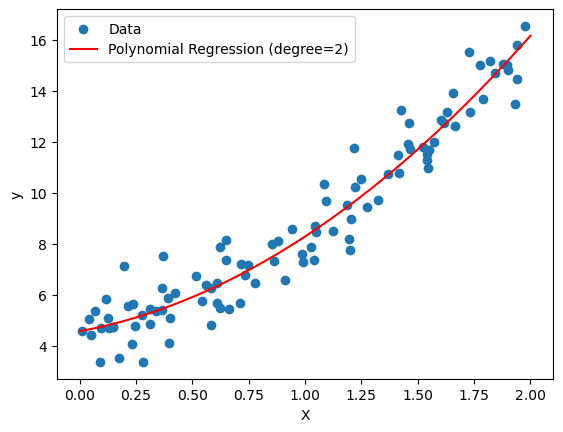

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * X**2 + np.random.randn(100, 1)

# Fit polynomial regression model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Generate predictions
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = model.predict(X_new)

# Plot the data and polynomial regression curve
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#### Q8. What are the advantages and disadvantages of polynomial regression compared to linear regression? In what situations would you prefer to use polynomial regression?


#### Advantages of Polynomial Regression:
A.Flexibility in Modeling Non-linear Relationships:
Polynomial regression can capture non-linear patterns in the data, making it more flexible than linear regression.

B.Higher Order Fits:
It can fit data with higher-order relationships, allowing for a better fit to complex datasets.

C.Expressiveness:
Polynomial regression can express a wider range of relationships between variables.

#### Disadvantages of Polynomial Regression:
A.Overfitting:
Polynomial regression, especially with higher-degree polynomials, is prone to overfitting. It may fit the training data too closely and fail to generalize well to new, unseen data.

B.Increased Complexity:
Higher-degree polynomials introduce more parameters to estimate, making the model more complex and increasing the risk of overfitting.

C.Less Interpretability:
As the degree of the polynomial increases, the interpretability of the model decreases. It becomes challenging to discern the contribution of each variable to the prediction.

#### Example

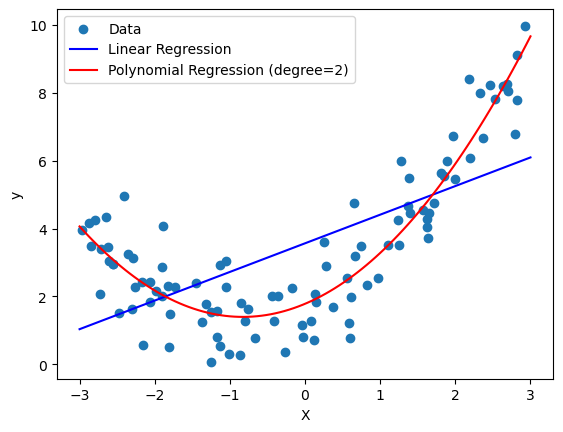

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(100, 1)

# Fit linear regression
model_linear = LinearRegression()
model_linear.fit(X, y)

# Fit polynomial regression with degree 2
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X, y)

# Generate predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_pred_linear = model_linear.predict(X_new)
y_pred_poly = model_poly.predict(X_new)

# Plot the data and regression curves
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X_new, y_pred_poly, color='red', label='Polynomial Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
